# Analysis for Insight Project

## Setup

In [77]:
# import modules
import pandas as pd
import numpy as np
import rootpath
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import qgrid
import matplotlib.pyplot as plt

# Set root path for project
path = rootpath.detect()

# Read in data
# Use list comprehension to read in all files
df = pd.read_csv(f"{path}/data/data_clean.csv", index_col=0)

In [78]:
df.head()

,product,product_type,price,size,ratings,total_reviews,link,price_oz,0,1,...,60,61,62,63,64,65,66,67,68,69
0,Anti-Aging Cleansing Gel,face wash,39.0,8.50,4.5,330.0,https://www.ulta.com/anti-aging-cleansing-gel?...,4.59,1.408482,-0.433049,...,0.070978,0.007907,0.071164,-0.004429,0.071449,0.052677,0.040814,0.181165,0.000312,-0.034115
52,Essential-C Cleanser,face wash,40.0,6.75,4.6,272.0,https://www.ulta.com/essential-c-cleanser?prod...,5.93,1.692273,-0.334327,...,-0.067952,0.092941,-0.085718,0.083519,-0.026470,0.095582,-0.092331,0.176955,-0.006216,-0.021925
124,Squalane Cleanser,face wash,7.9,1.00,4.1,332.0,https://www.ulta.com/squalane-cleanser?product...,7.90,1.838453,-0.752250,...,0.212272,-0.010433,0.038155,0.093323,0.041337,0.168622,0.119676,0.056650,-0.019799,0.168964
184,Purity Made Simple One-Step Facial Cleanser,face wash,25.0,8.00,4.7,8599.0,https://www.ulta.com/purity-made-simple-one-st...,3.12,1.564310,-0.339959,...,0.133295,-0.026537,0.041422,0.100734,-0.078355,-0.046946,-0.008473,-0.007212,0.088524,0.055125
252,Brightening Cleanser,face wash,34.0,4.20,4.6,42.0,https://www.ulta.com/brightening-cleanser?prod...,8.10,1.248828,-0.344294,...,0.065994,0.031752,0.022277,0.041208,0.012039,-0.063189,-0.020513,0.022545,0.022670,0.007932


In [85]:
#features = df.copy().set_index('product')
# Old, before dimensionality reduction
features = df.copy().drop(['product_type','price','size','ratings', 
                           'total_reviews','link','price_oz'],
                          axis=1).set_index('product')
features.head()

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
product,,,,,,,,,,,,,,,,,,,,,
Anti-Aging Cleansing Gel,1.408482,-0.433049,-0.332922,-1.019825,0.256149,0.294091,-0.080970,-0.041014,-0.084777,-0.152678,...,0.070978,0.007907,0.071164,-0.004429,0.071449,0.052677,0.040814,0.181165,0.000312,-0.034115
Essential-C Cleanser,1.692273,-0.334327,-0.198100,-0.721162,0.311682,0.403308,0.134368,0.140876,-0.073881,0.085826,...,-0.067952,0.092941,-0.085718,0.083519,-0.026470,0.095582,-0.092331,0.176955,-0.006216,-0.021925
Squalane Cleanser,1.838453,-0.752250,-0.164121,-0.689460,-0.311128,0.151342,0.332328,-0.106218,0.363916,0.319669,...,0.212272,-0.010433,0.038155,0.093323,0.041337,0.168622,0.119676,0.056650,-0.019799,0.168964
Purity Made Simple One-Step Facial Cleanser,1.564310,-0.339959,-0.317187,-0.864637,0.188944,0.069568,-0.032678,0.206118,0.212718,0.168260,...,0.133295,-0.026537,0.041422,0.100734,-0.078355,-0.046946,-0.008473,-0.007212,0.088524,0.055125
Brightening Cleanser,1.248828,-0.344294,-0.385217,-0.995253,0.086369,0.310106,0.041395,0.068215,0.149334,-0.177795,...,0.065994,0.031752,0.022277,0.041208,0.012039,-0.063189,-0.020513,0.022545,0.022670,0.007932


## K-means++

#### Run K-means and determine number of clusters based on silhouette coef

In [35]:
# Set cluster arguments
kmeans_kwargs = {
        "init": "k-means++",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 42,
        }

In [36]:
silhouette_coefficients = []

# Get silhouette coefficient for each cluster out of 50
for cluster in range(2, 50):
    kmeans = KMeans(n_clusters=cluster, **kmeans_kwargs)
    kmeans.fit(features)
    score = silhouette_score(features, kmeans.labels_)
    silhouette_coefficients.append(score)

#### Plot silhouette coefficients vs. clusters

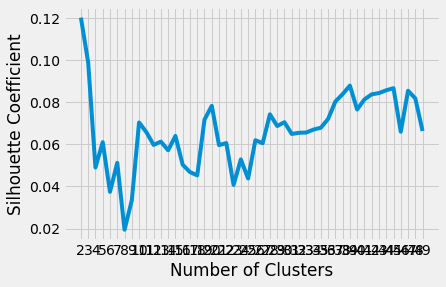

In [37]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 50), silhouette_coefficients)
plt.xticks(range(2, 50))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
# Add cluster labels to features


## Cosine similarity

In [50]:
from sklearn.metrics.pairwise import cosine_similarity
import heapq as hq

In [91]:
# Calculate cosine similarity for feature 1
res_cosine = cosine_similarity(features[0:1], features)
res_cosine = res_cosine.reshape(-1)
res_cosine = pd.DataFrame(res_cosine)
res_sim=df[['product', 'product_type','price','size','ratings',
            'total_reviews','link','price_oz']].copy()
res_sim['similarity']=res_cosine[[0]]
# Round similarity metric
res_sim['similarity']=round(res_sim['similarity'],2)
# Sort from top similarity metrics and ignoring self
res_sim.nlargest(6, 'similarity')[1:5]
res_sim.head()

,product,product_type,price,size,ratings,total_reviews,link,price_oz,similarity
0,Anti-Aging Cleansing Gel,face wash,39.0,8.50,4.5,330.0,https://www.ulta.com/anti-aging-cleansing-gel?...,4.59,1.00
52,Essential-C Cleanser,face wash,40.0,6.75,4.6,272.0,https://www.ulta.com/essential-c-cleanser?prod...,5.93,0.58
124,Squalane Cleanser,face wash,7.9,1.00,4.1,332.0,https://www.ulta.com/squalane-cleanser?product...,7.90,0.26
184,Purity Made Simple One-Step Facial Cleanser,face wash,25.0,8.00,4.7,8599.0,https://www.ulta.com/purity-made-simple-one-st...,3.12,0.30
252,Brightening Cleanser,face wash,34.0,4.20,4.6,42.0,https://www.ulta.com/brightening-cleanser?prod...,8.10,0.34


In [94]:
features.head()

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
product,,,,,,,,,,,,,,,,,,,,,
Anti-Aging Cleansing Gel,1.408482,-0.433049,-0.332922,-1.019825,0.256149,0.294091,-0.080970,-0.041014,-0.084777,-0.152678,...,0.070978,0.007907,0.071164,-0.004429,0.071449,0.052677,0.040814,0.181165,0.000312,-0.034115
Essential-C Cleanser,1.692273,-0.334327,-0.198100,-0.721162,0.311682,0.403308,0.134368,0.140876,-0.073881,0.085826,...,-0.067952,0.092941,-0.085718,0.083519,-0.026470,0.095582,-0.092331,0.176955,-0.006216,-0.021925
Squalane Cleanser,1.838453,-0.752250,-0.164121,-0.689460,-0.311128,0.151342,0.332328,-0.106218,0.363916,0.319669,...,0.212272,-0.010433,0.038155,0.093323,0.041337,0.168622,0.119676,0.056650,-0.019799,0.168964
Purity Made Simple One-Step Facial Cleanser,1.564310,-0.339959,-0.317187,-0.864637,0.188944,0.069568,-0.032678,0.206118,0.212718,0.168260,...,0.133295,-0.026537,0.041422,0.100734,-0.078355,-0.046946,-0.008473,-0.007212,0.088524,0.055125
Brightening Cleanser,1.248828,-0.344294,-0.385217,-0.995253,0.086369,0.310106,0.041395,0.068215,0.149334,-0.177795,...,0.065994,0.031752,0.022277,0.041208,0.012039,-0.063189,-0.020513,0.022545,0.022670,0.007932
